# **Data Science and Business Analytics**
**Task 6 : Prediction using decision Tree Algorithm**

**Name - Anurag Vishwajeet Kulkarni**

In [635]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [636]:
data=pd.read_csv("/content/Iris.csv") #load data

In [637]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [638]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [639]:
x=data.drop(["Id","Species"],axis=1)
y=data["Species"]


In [640]:
y=y.map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [641]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [642]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=0) #Splitting Data

In [643]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(100, 4)
(100,)
(50, 4)
(50,)


In [644]:
dtree=DecisionTreeClassifier(criterion="gini",max_depth=4)
dt=dtree.fit(xtrain,ytrain)


In [645]:
ypred=dt.predict(xtest)

# **Accuracy and Confusion Matrix**

In [646]:
cm=confusion_matrix(ytest,ypred)


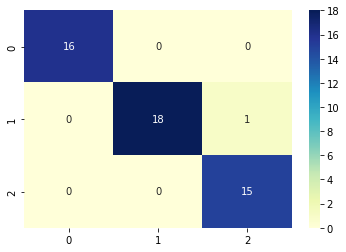

In [647]:
hm=sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu")

In [648]:
accuracy=accuracy_score(ytest,ypred)
print("Accuracy=",accuracy*100,"%")

Accuracy= 98.0 %


# **Displaying Decision Tree**

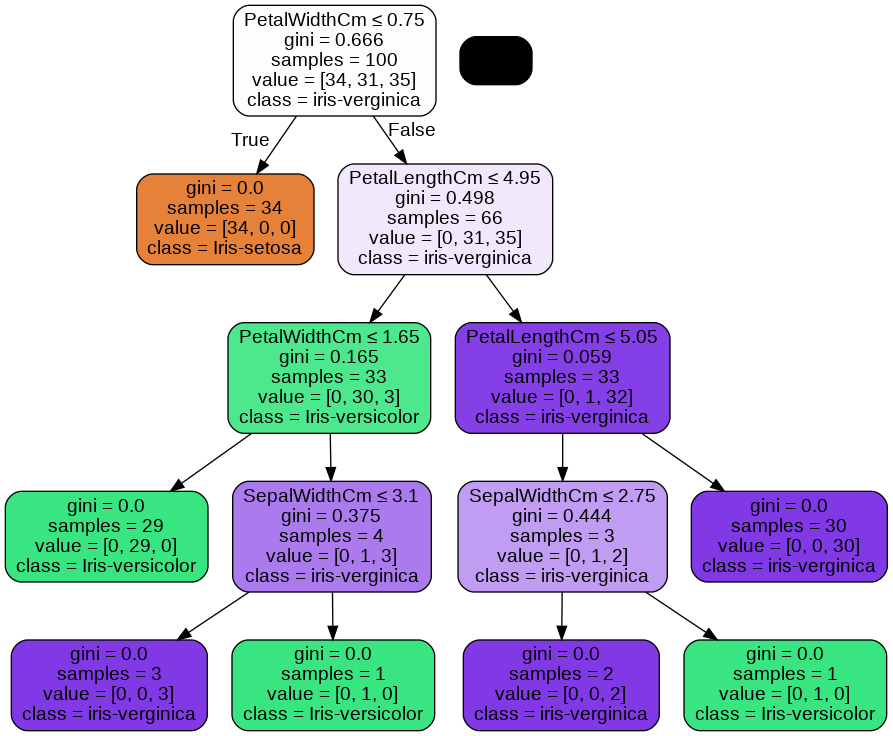

In [649]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
model=export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns, class_names = ['Iris-setosa','Iris-versicolor','iris-verginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())